In [2]:
!pip install pyflux

  Stored in directory: C:\Users\deejhanj\AppData\Local\pip\Cache\wheels\36\24\09\d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
  Stored in directory: C:\Users\deejhanj\AppData\Local\pip\Cache\wheels\58\08\1a\722554a81c38724475372972cd0e50081ec63c7a58e3c48fa8
Successfully built pyflux algopy


You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pyflux as pf
from datetime import datetime
from pandas_datareader.data import DataReader
from dateutil.parser import parse
from datetime import datetime


In [16]:
btc_data = pd.read_csv("C:/Users/deejhanj/Downloads/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")
# df = pd.read_csv("C:/Users/deejhanj/Downloads/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")


In [18]:
btc_data['date'] = pd.to_datetime(btc_data['Timestamp'],unit='s').dt.date
group = btc_data.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [41]:
Real_Price

date
2011-12-31       4.471603
2012-01-01       4.806667
2012-01-02       5.000000
2012-01-03       5.252500
2012-01-04       5.208159
2012-01-05       6.284127
2012-01-06       6.438999
2012-01-07       6.800000
2012-01-08       6.950000
2012-01-09       6.582770
2012-01-10       6.603000
2012-01-11       7.120685
2012-01-12       7.062500
2012-01-13       6.969237
2012-01-14       6.414081
2012-01-15       7.150000
2012-01-16       6.714286
2012-01-17       6.148346
2012-01-18       6.240688
2012-01-19       6.225714
2012-01-20       6.835000
2012-01-21       6.386000
2012-01-22       6.485000
2012-01-23       6.407500
2012-01-24       6.495556
2012-01-25       6.283664
2012-01-26       6.184092
2012-01-27       5.651429
2012-01-28       4.910000
2012-01-29       5.696000
                 ...     
2019-02-12    3577.873807
2019-02-13    3581.973573
2019-02-14    3568.821387
2019-02-15    3570.444201
2019-02-16    3587.674874
2019-02-17    3585.287170
2019-02-18    3756.673369
2019-02

Text(0,0.5,'Bitcoin price')

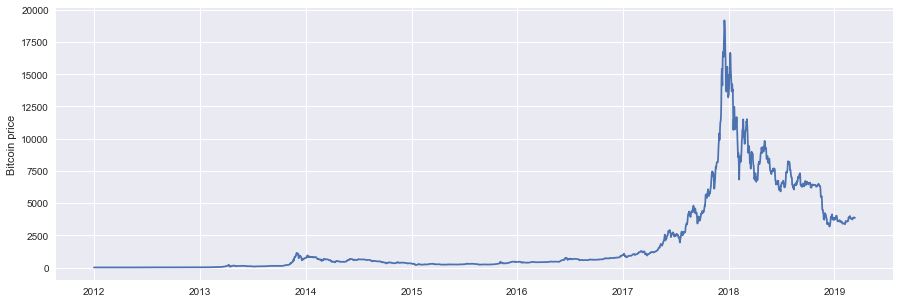

In [22]:
plt.figure(figsize=(15,5))
plt.plot(Real_Price)
plt.ylabel('Bitcoin price')

In [36]:
Real_Price.index

Index([2011-12-31, 2012-01-01, 2012-01-02, 2012-01-03, 2012-01-04, 2012-01-05,
       2012-01-06, 2012-01-07, 2012-01-08, 2012-01-09,
       ...
       2019-03-04, 2019-03-05, 2019-03-06, 2019-03-07, 2019-03-08, 2019-03-09,
       2019-03-10, 2019-03-11, 2019-03-12, 2019-03-13],
      dtype='object', name='date', length=2627)

In [45]:
Real_Price.index =  pd.to_datetime(Real_Price.index)

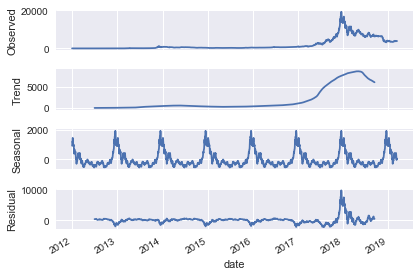

In [65]:
# from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition  = seasonal_decompose(Real_Price, model='additive', freq = 365)
fig = ss_decomposition.plot()
plt.figure()
plt.show()

In [62]:
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

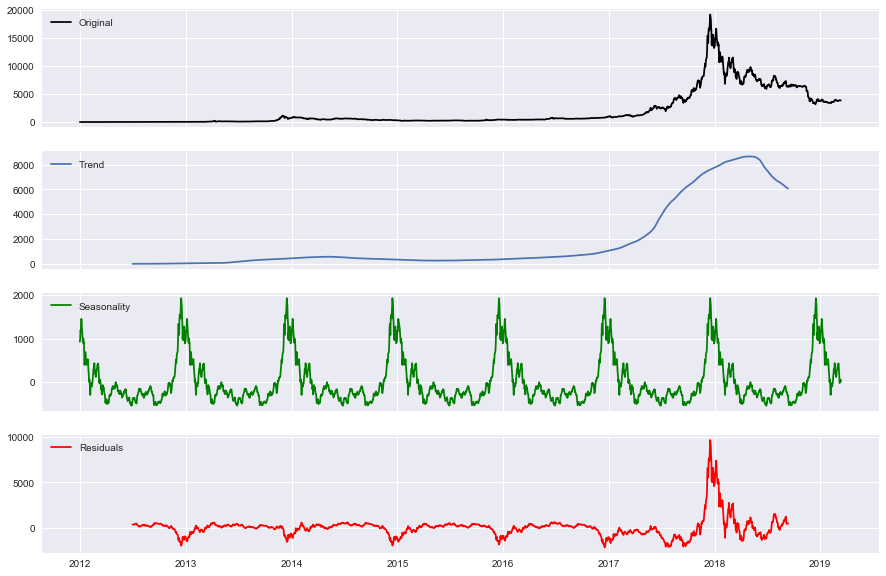

In [71]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(Real_Price, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

Time series data is data that is measured at equally-spaced intervals. Think of a sensor that takes measurements every minute.
Notice how both trend and seasonality are a function of time but independent of one another

If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series

Text(0,0.5,'BTC Price')

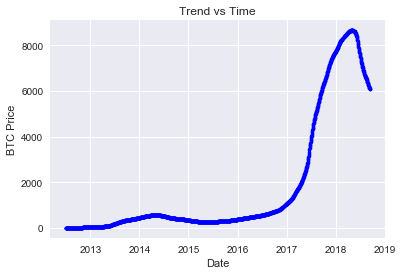

In [76]:
import matplotlib.pyplot as plt

plt.plot(Real_Price.index, estimated_trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("Date")
plt.ylabel("BTC Price")

Text(0,0.5,'BTC Price')

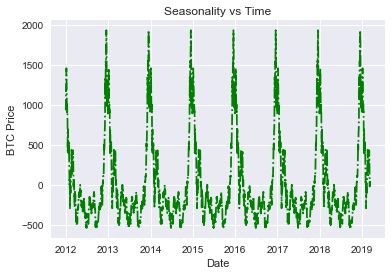

In [77]:
plt.plot(Real_Price.index, estimated_seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("Date")
plt.ylabel("BTC Price")

Text(0,0.5,'BTC Price')

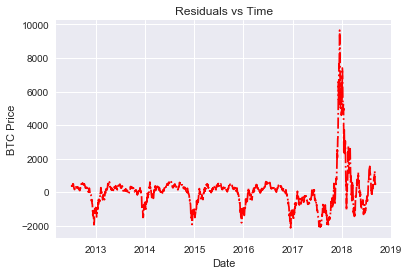

In [78]:
plt.plot(Real_Price.index, estimated_residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("Date")
plt.ylabel("BTC Price")

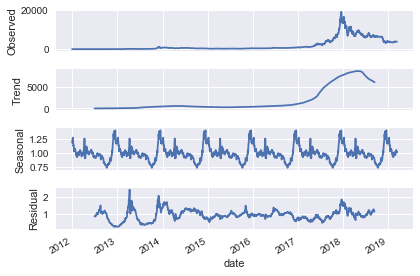

In [60]:
result = seasonal_decompose(Real_Price, model='multiplicative', freq = 365)
fig = result.plot()
plt.figure()
plt.show()